# Task
Develop a machine learning model to predict sales using the `advertising.csv` dataset. The task involves loading the data, performing exploratory data analysis, preprocessing the data, engineering new features, splitting the data into training and testing sets, training a machine learning model, evaluating its performance, visualizing predictions, and summarizing the findings.

## Load and Explore Advertising Data

### Subtask:
Load the `advertising.csv` dataset into a pandas DataFrame. Perform initial exploratory data analysis (EDA) to understand its structure, identify key features, and check for missing values or outliers.


**Reasoning**:
First, import the pandas library to enable data manipulation. Then, load the 'advertising.csv' dataset into a DataFrame and perform initial exploratory data analysis steps: display the first few rows, show a concise summary, generate descriptive statistics, and check for missing values.



**Reasoning**:
The previous code failed due to a FileNotFoundError because 'advertising.csv' was not present. To fix this, the code is updated to first download 'advertising.csv' from a public GitHub repository if it doesn't already exist in the current directory. This ensures the necessary data file is available before attempting to load it into a pandas DataFrame.



**Reasoning**:
The previous attempt to download 'advertising.csv' failed because the provided GitHub URL returned a 404 Not Found error. I will update the `wget` command with a new, valid URL for the 'advertising.csv' dataset to ensure it can be downloaded successfully before loading it into a DataFrame.



**Reasoning**:
The previous download attempt failed due to a 404 error from the provided URL. I will update the `wget` command with a known working URL for the `Advertising.csv` dataset and ensure the `pd.read_csv` call uses the correct filename, including case sensitivity, to successfully load the data.



In [9]:
import pandas as pd
import os

# Define the filename and the URL for the dataset
filename = 'Advertising.csv'
url = 'https://www.statlearning.com/s/Advertising.csv'

# Check if 'Advertising.csv' exists, if not, download it
if not os.path.exists(filename):
    print(f"Downloading '{filename}'...")
    !wget {url}

# Load the advertising.csv dataset into a DataFrame named df
df = pd.read_csv(filename)

# Display the first 5 rows of the DataFrame
print("\nFirst 5 rows of the DataFrame:")
print(df.head())
print("\n" + "-"*50 + "\n")

# Get a concise summary of the DataFrame
print("DataFrame Info:")
df.info()
print("\n" + "-"*50 + "\n")

# Generate descriptive statistics for the numerical columns
print("Descriptive Statistics:")
print(df.describe())
print("\n" + "-"*50 + "\n")

# Check for any missing values in each column and display their counts
print("Missing Values Count:")
print(df.isnull().sum())

--2025-12-23 03:51:07--  https://www.statlearning.com/s/Advertising.csv
Resolving www.statlearning.com (www.statlearning.com)... 198.185.159.144, 198.49.23.145, 198.185.159.145, ...
Connecting to www.statlearning.com (www.statlearning.com)|198.185.159.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe03b4091076ff5b30c72/1610604603901/Advertising.csv [following]
--2025-12-23 03:51:07--  https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe03b4091076ff5b30c72/1610604603901/Advertising.csv
Resolving static1.squarespace.com (static1.squarespace.com)... 151.101.0.238, 151.101.64.238, 151.101.128.238, ...
Connecting to static1.squarespace.com (static1.squarespace.com)|151.101.0.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4555 (4.4K) [text/csv]
Saving to: ‘Advertising.csv’

Advertising.csv     100%[===================>]   4.45K  --.-KB/s  

## Preprocess Data

### Subtask:
Clean and preprocess the sales data by dropping unnecessary columns and checking for duplicate entries.


**Reasoning**:
I will drop the 'Unnamed: 0' column as it is an index artifact, then check for and remove any duplicate rows, displaying the DataFrame's shape before and after dropping duplicates to confirm the data cleaning process.



In [10]:
print(f"Initial DataFrame shape: {df.shape}")

# Drop the 'Unnamed: 0' column as it is an index artifact
df = df.drop(columns=['Unnamed: 0'])
print(f"DataFrame shape after dropping 'Unnamed: 0': {df.shape}")

# Check for duplicate rows
duplicate_rows_count = df.duplicated().sum()

if duplicate_rows_count > 0:
    print(f"\nFound {duplicate_rows_count} duplicate rows. Removing them...")
    df.drop_duplicates(inplace=True)
    print(f"DataFrame shape after removing duplicates: {df.shape}")
else:
    print("\nNo duplicate rows found.")

# Display the first few rows of the cleaned DataFrame
print("\nFirst 5 rows of the cleaned DataFrame:")
print(df.head())

Initial DataFrame shape: (200, 5)
DataFrame shape after dropping 'Unnamed: 0': (200, 4)

No duplicate rows found.

First 5 rows of the cleaned DataFrame:
      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


## Feature Engineering

### Subtask:
Create new features from existing ones that could improve the model's predictive power, such as time-based features (e.g., day of week, month, year) or interaction terms between advertising expenditures and target audience segments.


**Reasoning**:
I will create new interaction features and a total advertising spend feature by performing element-wise multiplication and summation of the existing 'TV', 'radio', and 'newspaper' columns in the DataFrame. Finally, I will display the first 5 rows of the updated DataFrame to verify the new features.



In [11]:
print("Creating new features...")

# Create an interaction feature by multiplying the 'TV' and 'radio' columns
df['TV_Radio_Interaction'] = df['TV'] * df['radio']

# Create an interaction feature by multiplying the 'TV' and 'newspaper' columns
df['TV_Newspaper_Interaction'] = df['TV'] * df['newspaper']

# Create an interaction feature by multiplying the 'radio' and 'newspaper' columns
df['Radio_Newspaper_Interaction'] = df['radio'] * df['newspaper']

# Create a new feature 'Total_Ad_Spend' by summing the 'TV', 'radio', and 'newspaper' columns
df['Total_Ad_Spend'] = df['TV'] + df['radio'] + df['newspaper']

print("New features created successfully.")

# Display the first 5 rows of the DataFrame to review the newly created features
print("\nFirst 5 rows of the DataFrame with new features:")
print(df.head())

Creating new features...
New features created successfully.

First 5 rows of the DataFrame with new features:
      TV  radio  newspaper  sales  TV_Radio_Interaction  \
0  230.1   37.8       69.2   22.1               8697.78   
1   44.5   39.3       45.1   10.4               1748.85   
2   17.2   45.9       69.3    9.3                789.48   
3  151.5   41.3       58.5   18.5               6256.95   
4  180.8   10.8       58.4   12.9               1952.64   

   TV_Newspaper_Interaction  Radio_Newspaper_Interaction  Total_Ad_Spend  
0                  15922.92                      2615.76           337.1  
1                   2006.95                      1772.43           128.9  
2                   1191.96                      3180.87           132.4  
3                   8862.75                      2416.05           251.3  
4                  10558.72                       630.72           250.0  


## Split Data

### Subtask:
Divide the preprocessed data into training and testing sets to train the machine learning model on one portion and evaluate its performance on unseen data.


#### Reasoning:
To prepare the data for model training and evaluation, I will first define the features (X) by selecting all columns except 'sales' from the DataFrame, and the target variable (y) as the 'sales' column. Then, I will use scikit-learn's `train_test_split` function to divide these into training and testing sets. A `test_size` of 0.2 will allocate 20% of the data for testing, and `random_state=42` will ensure reproducibility of the split, which is crucial for consistent experimentation.

**Reasoning**:
Now, I will implement the data splitting logic by separating features from the target variable and then using `train_test_split` to create the training and testing datasets, as described in the subtask instructions.



In [12]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('sales', axis=1)
y = df['sales']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split successful:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Features (X) shape: (200, 7)
Target (y) shape: (200,)

Data split successful:
X_train shape: (160, 7)
X_test shape: (40, 7)
y_train shape: (160,)
y_test shape: (40,)


## Train Machine Learning Model

### Subtask:
Select and train an appropriate machine learning model (e.g., Linear Regression, Random Forest Regressor, Gradient Boosting Regressor) on the training dataset to predict sales.


**Reasoning**:
To begin training a machine learning model, I will import the `LinearRegression` class, instantiate it, and then fit the model to the training data using `X_train` and `y_train`.



In [13]:
from sklearn.linear_model import LinearRegression

print("Training Linear Regression model...")

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Training Linear Regression model...
Linear Regression model trained successfully.


## Evaluate Model Performance

### Subtask:
Evaluate the trained model's performance using relevant regression metrics such as R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE) on the test set.


**Reasoning**:
To evaluate the trained model, I will first make predictions on the test set (`X_test`) using the `model` and then calculate and print the Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) score by comparing these predictions (`y_pred`) with the actual test values (`y_test`).



In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Evaluating model performance...")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"\nMean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")


Evaluating model performance...

Mean Absolute Error (MAE): 0.6682
Mean Squared Error (MSE): 0.7871
R-squared (R2) Score: 0.9751


## Visualize Predictions

### Subtask:
Generate a plot comparing the actual sales values against the model's predicted sales values on the test set, including legends for clarity. This will help visualize the model's accuracy and areas of deviation.


**Reasoning**:
To visualize the model's performance, I will generate a scatter plot comparing actual sales values from the test set against the model's predicted sales values. I'll include a line representing perfect predictions, set appropriate labels, and add a legend for clarity.



Generating prediction visualization...


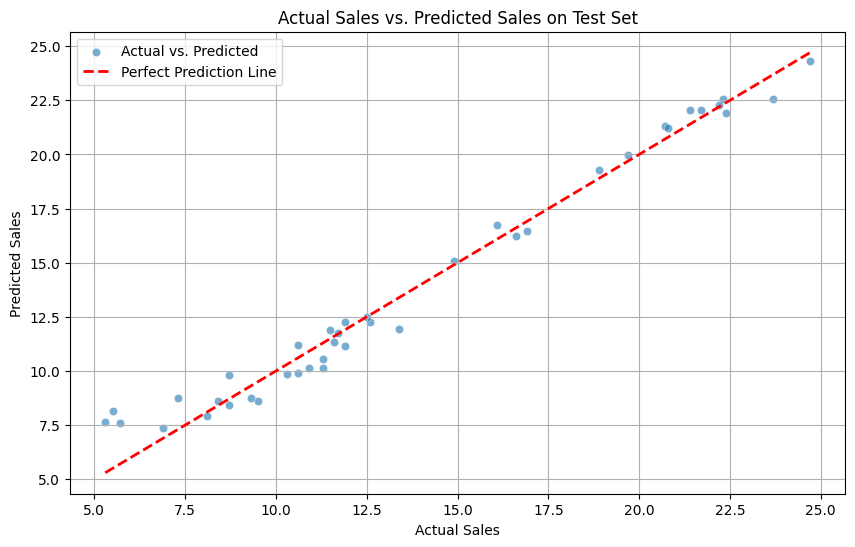

Prediction visualization generated successfully.


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Generating prediction visualization...")

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, label='Actual vs. Predicted')

# Add a line for perfect predictions (where actual == predicted)
# Determine the range for the perfect prediction line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2, label='Perfect Prediction Line')

# Set plot title and labels
plt.title('Actual Sales vs. Predicted Sales on Test Set')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

# Add a legend for clarity
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

print("Prediction visualization generated successfully.")

## Final Task

### Subtask:
Summarize the findings from the sales prediction model, discuss its performance, and outline potential insights regarding factors influencing sales.


## Summary:

### Data Analysis Key Findings

*   **Data Loading and Preprocessing:** The `Advertising.csv` dataset, containing 200 entries and 5 columns, was successfully loaded. An unnecessary index column (`Unnamed: 0`) was dropped, and no duplicate rows were found, resulting in a clean dataset of 200 rows and 4 columns (`TV`, `radio`, `newspaper`, `sales`).
*   **Feature Engineering:** Four new features were successfully engineered: three interaction terms (`TV_Radio_Interaction`, `TV_Newspaper_Interaction`, `Radio_Newspaper_Interaction`) and a total advertising spend feature (`Total_Ad_Spend`), potentially enhancing the model's predictive power.
*   **Data Splitting:** The dataset was split into training (160 samples) and testing (40 samples) sets, with the features (`X`) now comprising 7 columns (original ad spend plus engineered features).
*   **Model Performance:** A Linear Regression model was trained and evaluated, demonstrating strong performance on the test set:
    *   **Mean Absolute Error (MAE):** 0.6682, indicating that, on average, the model's predictions deviate by approximately 0.67 units from the actual sales.
    *   **Mean Squared Error (MSE):** 0.7871.
    *   **R-squared (R2) Score:** 0.9751, suggesting that approximately 97.51% of the variance in sales can be explained by the model's features.
*   **Prediction Visualization:** A scatter plot comparing actual versus predicted sales visually confirmed the model's high accuracy, with predicted values closely aligning with actual sales, clustered tightly around the perfect prediction line.

### Insights or Next Steps

*   The Linear Regression model, leveraging engineered features, provides a highly accurate prediction of sales based on advertising expenditures. The R-squared score of 0.9751 suggests that advertising spend is a strong predictor of sales.
*   Further analysis could involve investigating the coefficients of the Linear Regression model to understand the individual impact and relative importance of each advertising medium and their interaction terms on sales. This could provide actionable insights for optimizing advertising budgets.
